In [1]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
# from data_import import df_stocks
# from data_import import df_weather
from data_import import df_merged
import pandas as pd
import numpy as np
df_merged

,Volume,% Change,TMAX,TMIN,TOTALPRCP,binned
Date,,,,,,
2005-02-25,70221808,0.973561,36,22,8.13,High
2005-02-28,79695344,-0.445287,35,30,6.20,High
2005-03-01,54607412,0.380156,42,30,12.19,High
2005-03-02,73733090,0.342173,39,28,6.00,High
2005-03-03,71286823,-0.358524,33,23,5.00,High
...,...,...,...,...,...,...
2017-11-06,49529148,0.212931,66,46,0.01,Low
2017-11-07,57218448,-0.115844,49,40,0.70,Low
2017-11-08,50277699,0.247611,49,39,0.00,Low


Merged Data Z-Score:

In [2]:
# df_stocks.apply(zscore)

cols = list(df_merged.select_dtypes(include=np.number).columns)

for col in cols:
    col_zscore = col + ' Zscore'
    df_merged[col_zscore] = (df_merged[col] - df_merged[col].mean())/df_merged[col].std(ddof=0)
 
df_merged


,Volume,% Change,TMAX,TMIN,TOTALPRCP,binned,Volume Zscore,% Change Zscore,TMAX Zscore,TMIN Zscore,TOTALPRCP Zscore
Date,,,,,,,,,,,
2005-02-25,70221808,0.973561,36,22,8.13,High,-0.828570,1.018158,-1.550376,-1.673847,3.089331
2005-02-28,79695344,-0.445287,35,30,6.20,High,-0.748335,-0.484756,-1.605841,-1.188572,2.291235
2005-03-01,54607412,0.380156,42,30,12.19,High,-0.960814,0.389594,-1.217588,-1.188572,4.768227
2005-03-02,73733090,0.342173,39,28,6.00,High,-0.798832,0.349360,-1.383982,-1.309891,2.208530
2005-03-03,71286823,-0.358524,33,23,5.00,High,-0.819550,-0.392853,-1.716770,-1.613188,1.795009
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-06,49529148,0.212931,66,46,0.01,Low,-1.003823,0.212460,0.113563,-0.218021,-0.268462
2017-11-07,57218448,-0.115844,49,40,0.70,Low,-0.938700,-0.135794,-0.829336,-0.581978,0.016868
2017-11-08,50277699,0.247611,49,39,0.00,Low,-0.997483,0.249195,-0.829336,-0.642637,-0.272597


Weather Z-Scores

In [3]:
# cols = list(df_weather.columns)

# for col in cols:
#     col_zscore = col + ' Zscore'
#     df_weather[col_zscore] = (df_weather[col] - df_weather[col].mean())/df_weather[col].std(ddof=0)
    
# df_weather

Vizualization - Z Scores

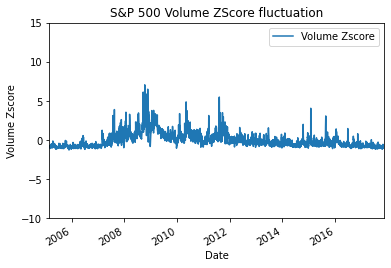

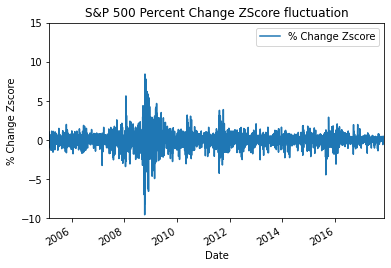

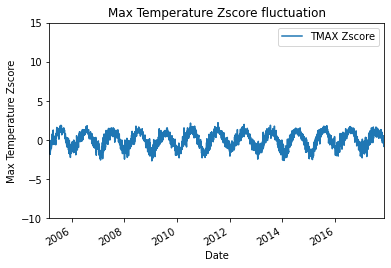

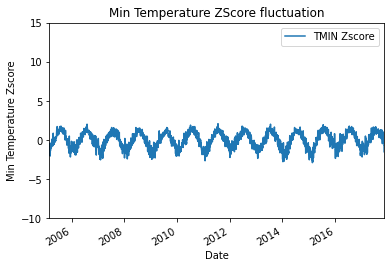

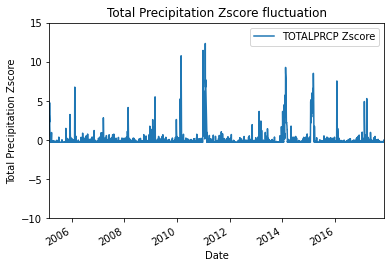

In [15]:
df_merged.plot(y = "Volume Zscore")
plt.xlabel("Date")
plt.ylabel("Volume Zscore")
plt.title("S&P 500 Volume ZScore fluctuation")
plt.axis([df_merged.index.min(), df_merged.index.max(), -10, 15])
plt.show()

df_merged.plot(y = "% Change Zscore")
plt.xlabel("Date")
plt.ylabel("% Change Zscore")
plt.title("S&P 500 Percent Change ZScore fluctuation")
plt.axis([df_merged.index.min(), df_merged.index.max(), -10, 15])
plt.show()

df_merged.plot(y = "TMAX Zscore")
plt.xlabel("Date")
plt.ylabel("Max Temperature Zscore")
plt.title("Max Temperature Zscore fluctuation")
plt.axis([df_merged.index.min(), df_merged.index.max(), -10, 15])
plt.show()

df_merged.plot(y = "TMIN Zscore")
plt.xlabel("Date")
plt.ylabel("Min Temperature Zscore")
plt.title("Min Temperature ZScore fluctuation")
plt.axis([df_merged.index.min(), df_merged.index.max(), -10, 15])
plt.show()

df_merged.plot(y = "TOTALPRCP Zscore")
plt.xlabel("Date")
plt.ylabel("Total Precipitation Zscore")
plt.title("Total Precipitation Zscore fluctuation")
plt.axis([df_merged.index.min(), df_merged.index.max(), -10, 15])
plt.show()



FIRST METHOD OF LINEAR REGRESSION:

In [5]:
stock_percent_np = np.array(df_merged['% Change'])
weather_precip_np = np.array(df_merged['TOTALPRCP'])

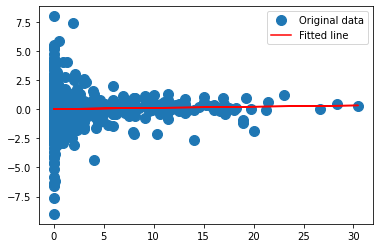

In [6]:
A = np.vstack([weather_precip_np, np.ones(len(weather_precip_np))]).T
m, c = np.linalg.lstsq(A, stock_percent_np, rcond=None)[0]
plt.plot(weather_precip_np, stock_percent_np, 'o', label='Original data', markersize=10)
plt.plot(weather_precip_np, m*weather_precip_np + c, 'r', label='Fitted line')
plt.legend()
plt.show()

SECOND METHOD OF LINEAR REGRESSION

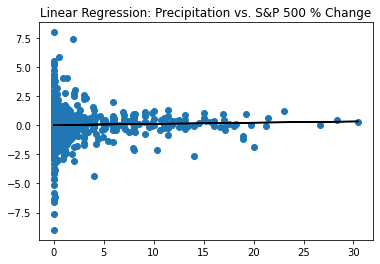

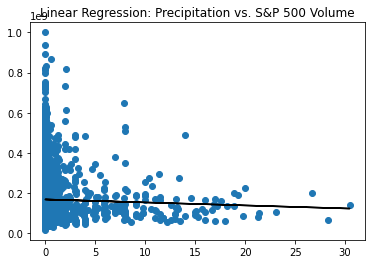

In [11]:
stock_volume = stock_percent = df_merged['Volume'].values.reshape(-1,1)
stock_percent = df_merged['% Change'].values.reshape(-1,1)
weather_precip = df_merged['TOTALPRCP'].values.reshape(-1,1)
weather_max = df_merged['TMAX'].values.reshape(-1,1)
weather_min = df_merged['TMIN'].values.reshape(-1,1)

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  
linear_regressor.fit(weather_precip, stock_percent)  
Y_pred = linear_regressor.predict(weather_precip)
plt.scatter(weather_precip, stock_percent)
plt.plot(weather_precip, Y_pred, color='black')
plt.title("Linear Regression: Precipitation vs. S&P 500 % Change")
plt.show()

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  
linear_regressor.fit(weather_precip, stock_volume)  
Y_pred = linear_regressor.predict(weather_precip)
plt.scatter(weather_precip, stock_volume)
plt.plot(weather_precip, Y_pred, color='black')
plt.title("Linear Regression: Precipitation vs. S&P 500 Volume")
plt.show()

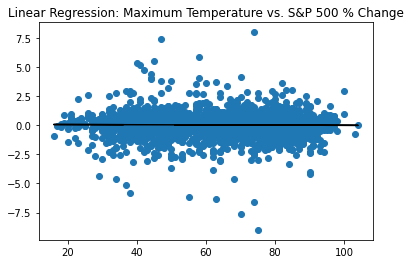

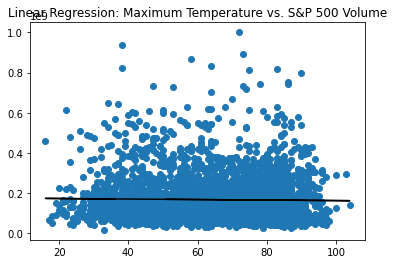

In [13]:
linear_regressor.fit(weather_max, stock_percent)  
Y_pred = linear_regressor.predict(weather_max) 
plt.scatter(weather_max, stock_percent)
plt.plot(weather_max, Y_pred, color='black')
plt.title("Linear Regression: Maximum Temperature vs. S&P 500 % Change")
plt.show()

linear_regressor.fit(weather_max, stock_volume)  
Y_pred = linear_regressor.predict(weather_max) 
plt.scatter(weather_max, stock_volume)
plt.plot(weather_max, Y_pred, color='black')
plt.title("Linear Regression: Maximum Temperature vs. S&P 500 Volume")
plt.show()

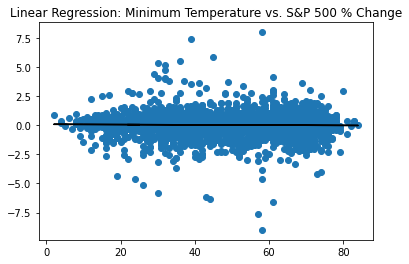

In [9]:
linear_regressor.fit(weather_min, stock_percent)  
Y_pred = linear_regressor.predict(weather_min) 
plt.scatter(weather_min, stock_percent)
plt.plot(weather_min, Y_pred, color='black')
plt.title("Linear Regression: Minimum Temperature vs. S&P 500 % Change")
plt.show()



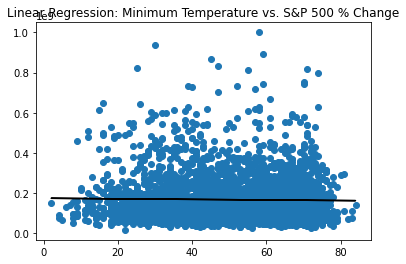

In [14]:
linear_regressor.fit(weather_min, stock_volume)  
Y_pred = linear_regressor.predict(weather_min) 
plt.scatter(weather_min, stock_volume)
plt.plot(weather_min, Y_pred, color='black')
plt.title("Linear Regression: Minimum Temperature vs. S&P 500 % Change")
plt.show()
